In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
# Importing playlist dataframes
df = pd.read_csv('data/encoded_playlist_songs.csv')
df_fav = pd.read_csv('data/favorite_songs.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          9769 non-null   object 
 1   name              9769 non-null   int64  
 2   album             9769 non-null   int64  
 3   artist            9769 non-null   int64  
 4   release_date      9769 non-null   int64  
 5   length            9769 non-null   int64  
 6   popularity        9769 non-null   int64  
 7   danceability      9769 non-null   float64
 8   acousticness      9769 non-null   float64
 9   energy            9769 non-null   float64
 10  instrumentalness  9769 non-null   float64
 11  liveness          9769 non-null   float64
 12  loudness          9769 non-null   float64
 13  speechiness       9769 non-null   float64
 14  tempo             9769 non-null   float64
 15  time_signature    9769 non-null   int64  
 16  favorite          9769 non-null   int64  


In [4]:
df_fav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          50 non-null     object 
 1   name              50 non-null     int64  
 2   album             50 non-null     int64  
 3   artist            50 non-null     int64  
 4   release_date      50 non-null     int64  
 5   length            50 non-null     int64  
 6   popularity        50 non-null     int64  
 7   danceability      50 non-null     float64
 8   acousticness      50 non-null     float64
 9   energy            50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  loudness          50 non-null     float64
 13  speechiness       50 non-null     float64
 14  tempo             50 non-null     float64
 15  time_signature    50 non-null     int64  
 16  favorite          50 non-null     int64  
dtyp

### Preparing data for model

In [5]:
df = pd.concat([df, df_fav], axis=0)
df.shape

(9819, 17)

In [6]:
X = df.drop(columns=['favorite', 'track_id'])
y = df.favorite

X.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,4008,3340,581,2524,242096,90,0.586,0.1820,0.616,0.000000,0.0927,-7.964,0.0324,148.088,4
1,6038,212,3746,2293,215626,97,0.680,0.0212,0.826,0.000012,0.5430,-5.487,0.0309,118.051,4
2,8118,2222,1091,2505,165506,88,0.722,0.0319,0.588,0.000000,0.1830,-5.932,0.0544,134.010,4
3,3096,2743,1917,2524,170813,89,0.658,0.0106,0.634,0.000000,0.1320,-5.797,0.0413,139.980,4
4,542,433,2439,2478,132780,94,0.778,0.1750,0.695,0.000000,0.1500,-6.865,0.0913,149.996,4


In [7]:
X.shape

(9819, 15)

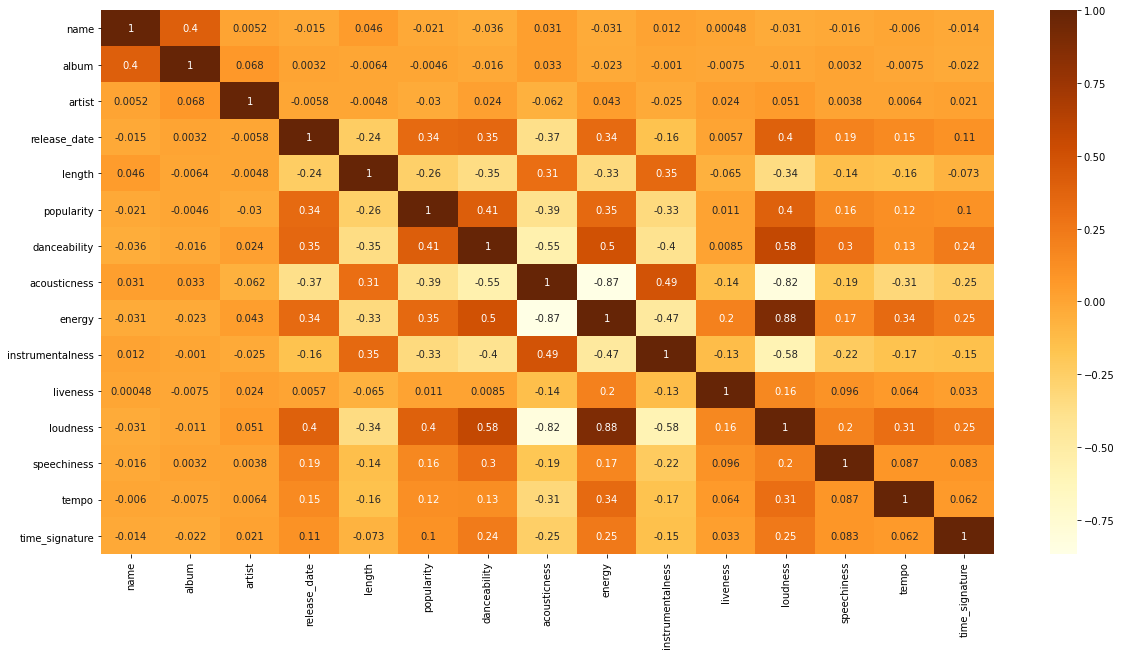

In [8]:
# Correlation Matrix of quantitative features
plt.figure(figsize=(20,10))
c = X.corr()
corr = sns.heatmap(c,cmap="YlOrBr",annot=True)

### Model Selection & Hyperparameter Tuning

In [9]:
# Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Checking for imbalance in data
y.value_counts()

0    9769
1      50
Name: favorite, dtype: int64

In [18]:
# Shuffle your dataset 
shuffle_df = X.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(X))

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [20]:
train_set.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1292,5647,6298,831,796,198360,27,0.588,0.1620,0.8820,0.0000,0.281,-8.175,0.3020,90.650,4
8973,7881,1504,557,1162,151280,6,0.160,0.8750,0.0541,0.0390,0.338,-30.762,0.0423,134.415,3
4950,4287,7044,2435,373,299626,47,0.558,0.1650,0.6950,0.0017,0.216,-7.853,0.0400,169.564,4
4271,944,926,2413,2519,175420,25,0.541,0.0114,0.9110,0.0000,0.180,-3.566,0.0448,119.052,4
649,1686,4435,3524,1177,299746,69,0.713,0.0402,0.7460,0.0000,0.601,-4.990,0.2590,135.021,4


In [15]:
# Train / Split Data
oversample = SMOTE()
X_os, y_os = oversample.fit_resample(X, y)
X_os['favorite'] = y_os
X_train, y_train = train_test_split(X_os.drop(columns='favorite'), X_os.favorite,test_size = .20)
# X_test, y_test = 

ValueError: too many values to unpack (expected 2)

In [13]:
y_train.value_counts()

1    7842
0    7788
Name: favorite, dtype: int64

In [14]:
y_test.value_counts()

0    1981
1    1927
Name: favorite, dtype: int64

In [13]:
# Checking for imbalance again
y_train.value_counts()

1    7816
0    7814
Name: favorite, dtype: int64

In [14]:
X_train.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
10229,3406,1871,3470,2297,135640,38,0.852028,0.174427,0.489884,0.000371,0.294738,-9.364194,0.276863,129.371900,4
17353,6128,1686,2167,1892,135084,34,0.814834,0.389966,0.409520,0.009649,0.239826,-10.613884,0.315841,146.424723,4
14872,4562,1993,618,1974,174273,64,0.633099,0.140757,0.502026,0.000002,0.263168,-7.838800,0.403331,159.531825,4
11098,1160,729,2107,1938,95328,38,0.604338,0.253974,0.555528,0.021466,0.235820,-9.374091,0.304657,119.663414,4
4826,6281,5447,2437,2413,198299,61,0.789000,0.513000,0.653000,0.000415,0.099200,-8.506000,0.094000,101.985000,4


#### Testing models

In [15]:
%%time
# Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=400)
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))

0.8289648231501412
CPU times: user 3.87 s, sys: 1.32 s, total: 5.19 s
Wall time: 1.66 s


In [16]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[3, 4, 5, 6, 10, 15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [17]:
%%time
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

CPU times: user 865 ms, sys: 10.9 ms, total: 876 ms
Wall time: 883 ms


0.9650589699146167

In [18]:
%%time
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[3, 6,12,15,20],
    'n_estimators':[10, 20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

CPU times: user 25.5 s, sys: 211 ms, total: 25.7 s
Wall time: 25.8 s


{'max_depth': 20, 'n_estimators': 30}

In [19]:
%%time
# RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 30, max_depth = 20))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

CPU times: user 7.58 s, sys: 47.5 ms, total: 7.63 s
Wall time: 7.65 s


0.9987871626850143

Since the RandomForestClassifier has the highest accuracy, I will use it to recommend songs.

### Using algorithm on test data

In [20]:
# Checking for imabalance
y_test.value_counts()

0    1955
1    1953
Name: favorite, dtype: int64

In [21]:
rf_test_scores = cross_val_score(rf, X_test, y_test, cv=10, scoring="f1")
np.mean(rf_test_scores)

0.9961714954306162

In [22]:
# Building a pipeline to use on regular data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 30, max_depth = 20))
pipe.fit(X_train, y_train)  # apply scaling on training data
# pipe.set_params(logisticrergession__n_estimators=30)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rf', RandomForestClassifier(n_estimators = 30, max_depth = 20))])
pipe.score(X_test, y_test)

0.9987205731832139

In [32]:
X.shape

(19538, 16)

In [30]:
len(pipe.predict(X.drop(['favorite'], axis=1)))

19538

## Predicting songs and saving to dataset

In [33]:
prediction = pipe.predict(X.drop(['favorite'], axis=1))
df['prediction'] = prediction

ValueError: Length of values (19538) does not match length of index (9819)

## Building the playlist from recommended songs

In [ ]:
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [ ]:
create_playlist(sp, username, 'Your New Jams', 'This playlist was created using python!')

In [ ]:
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [ ]:
fetch_playlists(sp,username).head()

In [ ]:
playlist_id = fetch_playlists(sp,username)['id'][0]

In [ ]:
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 50])
        index += 50

In [ ]:
list_track = df2.index
enrich_playlist(sp, username, playlist_id, list_track)
fetch_playlists(sp,username).head()